In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss, roc_auc_score, roc_curve
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


In [34]:
# 1. Генерация данных
# Создаем синтетический датасет для бинарной классификации.
# Данные будут содержать 2 класса (0 и 1).
X, y = make_classification(n_samples=1000,    # Количество образцов
                           n_features=2,     # Количество признаков (удобно для визуализации)
                           n_informative=2,  # Количество информативных признаков
                           n_redundant=0,    # Лишние признаки отсутствуют
                           random_state=42)  # Фиксируем генерацию для воспроизводимости

# Сохраняем данные в CSV файл для дальнейшего использования
data = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
data["Label"] = y
data.to_csv("classification_data.csv", index=False)

# Разделение данных на обучающую и тестовую выборки
# Обучающая выборка будет составлять 80% от общего числа данных.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# 2. Создание и обучение модели
# Инициализируем логистическую регрессию из sklearn и обучаем модель.
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [36]:
# 3. Оценка модели
# Выполняем предсказания на тестовых данных.
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Вероятности для класса 1


In [37]:
# 4. Метрики качества
# Рассчитываем метрики, чтобы оценить качество модели.
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
logloss = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Вывод результатов
print("Accuracy of Logistic Regression model:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nLog Loss:", logloss)
print("\nROC AUC Score:", roc_auc)

Accuracy of Logistic Regression model: 0.88

Confusion Matrix:
 [[89 12]
 [12 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200


Log Loss: 0.28659754254593217

ROC AUC Score: 0.9545954595459546


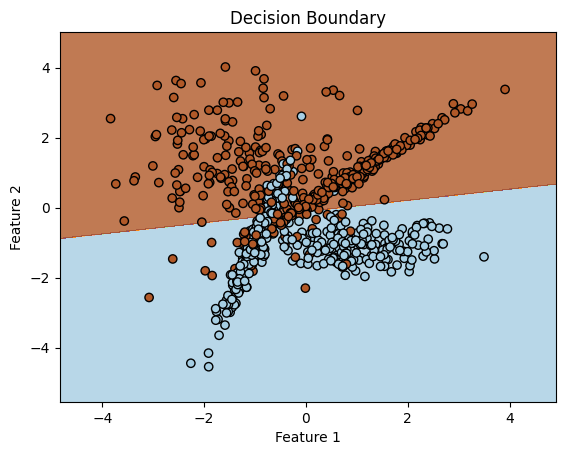

In [38]:
# 5. Визуализация классификационной границы
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Предсказания для всех точек сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(X_train, y_train, model)

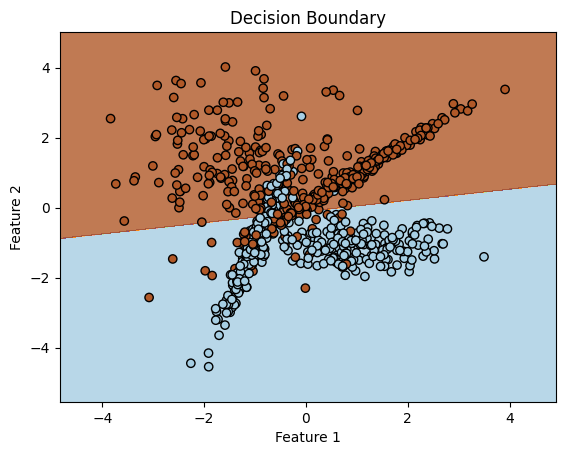

In [39]:
# Визуализация обучающей выборки и классификационной границы
plot_decision_boundary(X_train, y_train, model)